## Crop And Fertilizer Recommendation System using ML 

In [110]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [111]:
#Dataset
crop=pd.read_csv("DataSet/Crop_recommendation.csv")

In [112]:
# top 5 rows of the dataset
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [113]:
# end 5 rows of the dataset
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [114]:
crop.shape

(2200, 8)

In [115]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [116]:
# to check the missing values
crop.isnull().sum()


N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [117]:
# to check duplicate values
crop.duplicated().sum()

0

In [118]:
# to check the statistics of the dataset
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [119]:
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [120]:
# Check the target feature distribution
crop["label"].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [121]:
# Extract feature names from the dataset
features = crop.columns.to_list()

# Remove the target variable 'label' from the features list
features.remove("label")

# Print the features list
print(features)


['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


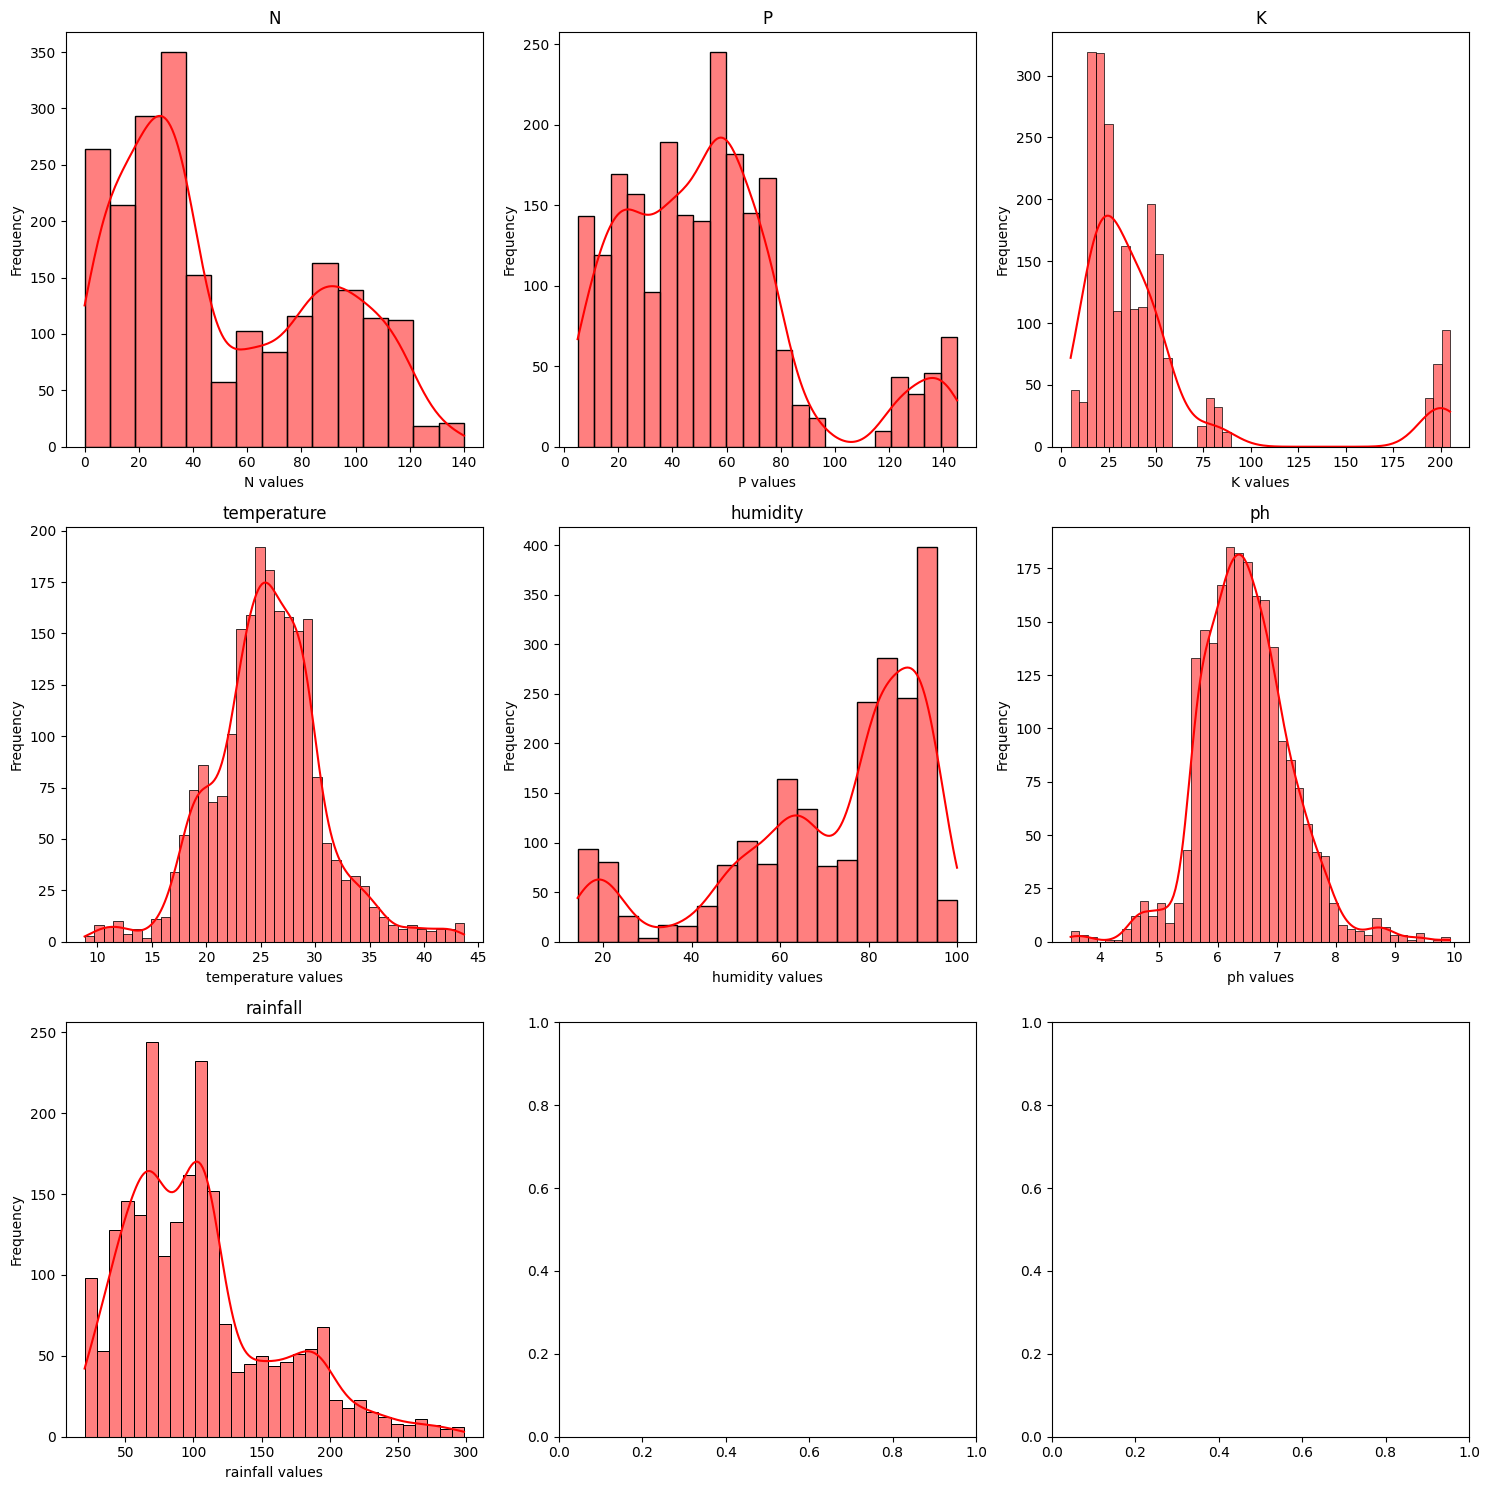

In [122]:
# Visualize the distribution of the target variable
# Import the necessary libraries
import seaborn as sns
# Create a pairplot of the dataset
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
# Plot a histogram for each feature
for i, subplot in zip(features, ax.flatten()):
    sns.histplot(crop[i], ax=subplot, kde=True,color="red")
    subplot.set_title(i)
    subplot.set_xlabel(f'{i} values')
    subplot.set_ylabel('Frequency')
# Adjust the layout
plt.tight_layout()
plt.show()

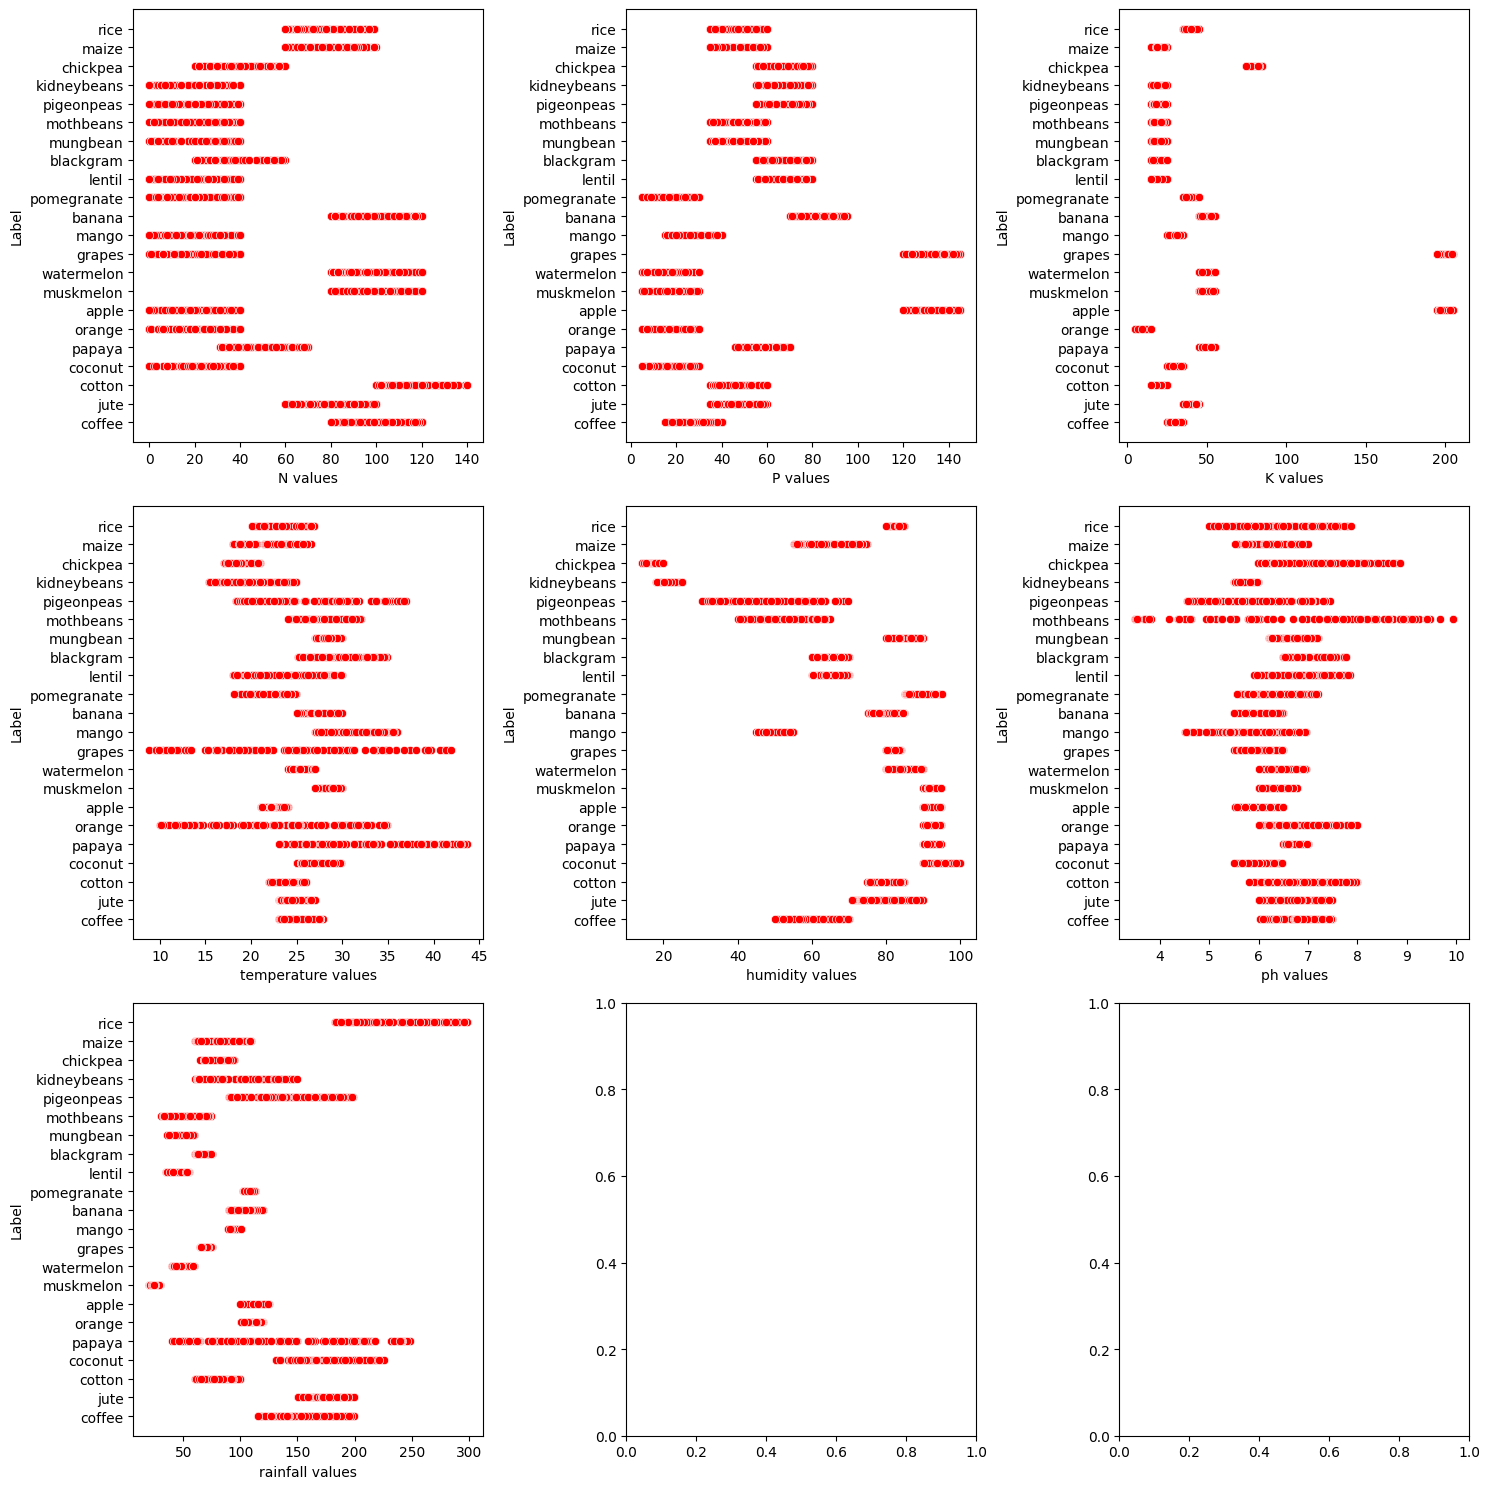

In [123]:
# Ploting scatter plot
import seaborn as sns 
# Create a pairplot of the dataset
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
# Plot a scatter plot for each feature
for i, subplot in zip(features, ax.flatten()):
    sns.scatterplot(x=i, y="label", data=crop, ax=subplot, color='red')
    subplot.set_xlabel(f'{i} values')
    subplot.set_ylabel('Label')
plt.tight_layout()
plt.show()

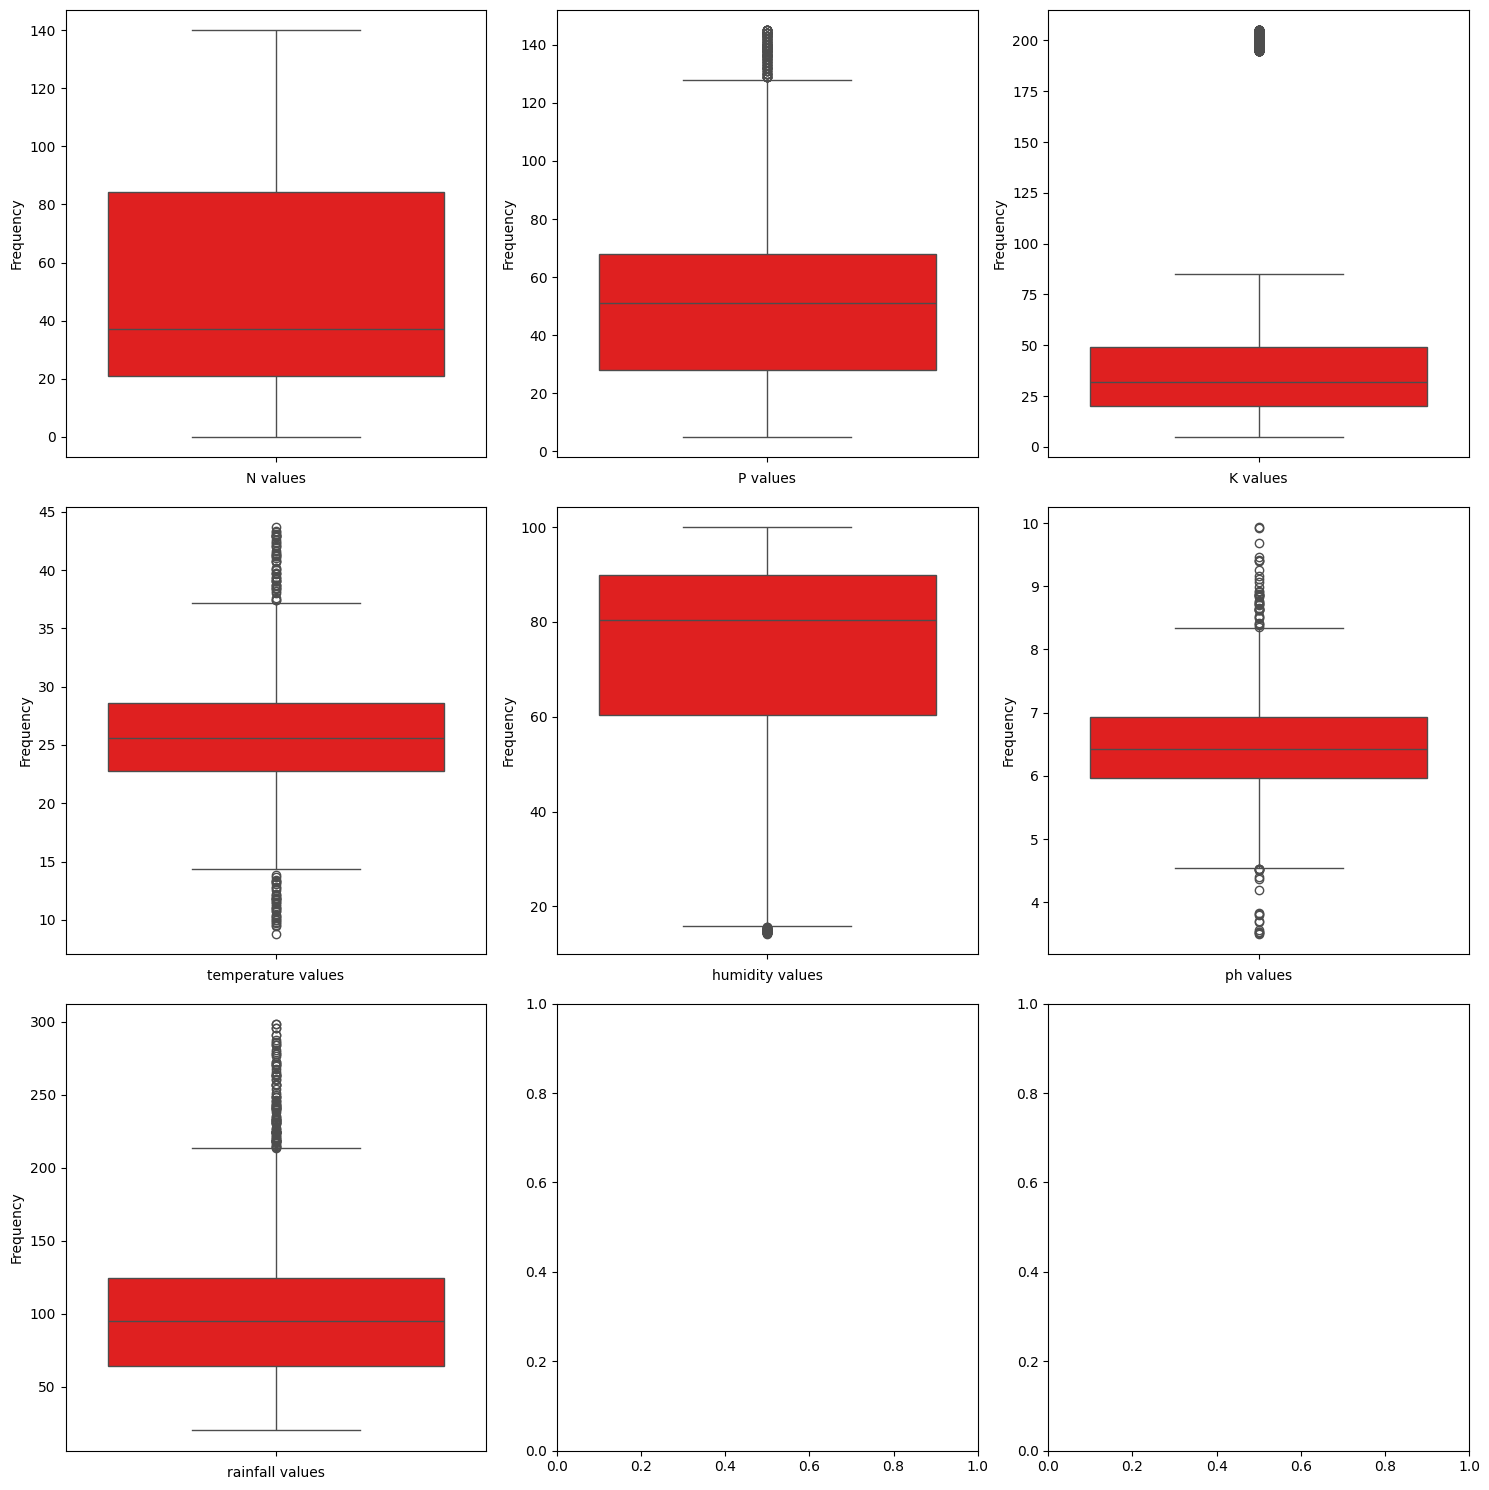

In [124]:
# Finding outliers - boxplot
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
# Plot a boxplot for each feature
for i, subplot in zip(features, ax.flatten()):
    sns.boxplot(crop[i], ax=subplot, color='red')
    subplot.set_xlabel(f'{i} values')
    subplot.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

In [125]:
# Correlation of the features
num_col = crop.select_dtypes(include=[np.number])
num_col

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [126]:

corr = num_col.corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


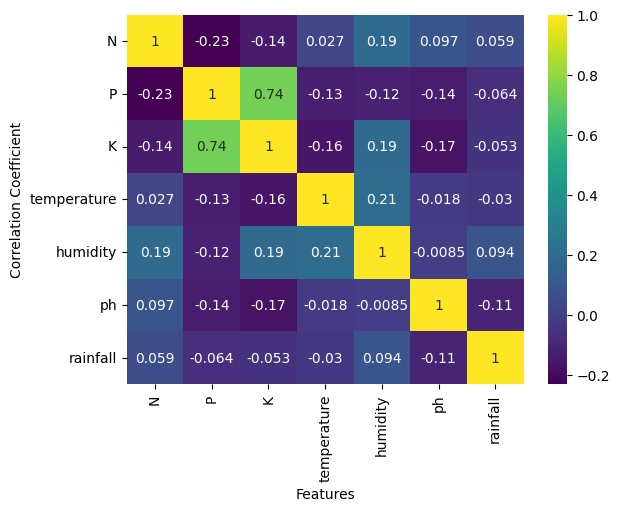

In [127]:
# Visualizing with Heatmap using a different color map
sns.heatmap(corr, annot=True, cmap="viridis")
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.show()

In [128]:
crop["label"].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [129]:
# Create a dictionary to map crop names to numerical values
crop_dict = {
    "rice": 0,
    "maize": 1,
    "chickpea": 2,
    "kidneybeans": 3,
    "mungbean": 4,
    "blackgram": 5,
    "lentil": 6,
    "pomegranate": 7,
    "banana": 8,
    "mango": 9,
    "grapes": 10,
    "watermelon": 11,
    "muskmelon": 12,
    "apple": 13,
    "orange": 14,
    "papaya": 15,
    "coconut": 16,
    "cotton": 17,
    "jute": 18,
    "coffee": 19,
}

In [130]:
# add a new column to the dataset
crop["crop_no"] = crop["label"].map(crop_dict)
crop.head()


,N,P,K,temperature,humidity,ph,rainfall,label,crop_no
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,0.0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,0.0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,0.0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,0.0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,0.0


In [131]:
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_no
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,19.0
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,19.0
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,19.0
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,19.0
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,19.0


In [132]:
# Drop the 'label' column from the dataset
crop.drop("label", axis=1, inplace=True)
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,crop_no
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,19.0
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,19.0
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,19.0
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,19.0
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,19.0
